In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D://MBA//SEM 4//Capstone Project & Viva Voce//Dataset//Amazon Book Reviews//Amazon Book Reviews.csv")
df.head()

,Id,Title,authors,categories,ratingsCount,User_id,review/helpfulness,review/score,review/text,word_count
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.0,ARI272XF8TOL4,74/81,5.0,With the publication of Everett Ferguson's boo...,999
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.0,A36TPZSH8LBT1,2/3,5.0,Everett Ferguson approaches the subject of ear...,86
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.0,ANX3DDV12ZRRU,2/3,4.0,This book is a continual resource. It is so bi...,31
3,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.0,A2H2LORTA5EZY2,3/5,4.0,This is a very useful and thorough text book. ...,25
4,157067051X,Voices from the Farm: Adventures in Community ...,Rupert Fike,Biography & Autobiography,1.0,A3W1KIKQ93S62,21/21,5.0,"Ironically, I grew up in a small town close to...",196


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240299 entries, 0 to 1240298
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1240299 non-null  object 
 1   Title               1240299 non-null  object 
 2   authors             1240299 non-null  object 
 3   categories          1240299 non-null  object 
 4   ratingsCount        1240299 non-null  float64
 5   User_id             1240299 non-null  object 
 6   review/helpfulness  1240299 non-null  object 
 7   review/score        1240299 non-null  float64
 8   review/text         1240299 non-null  object 
 9   word_count          1240299 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 94.6+ MB


In [4]:
df.shape

(1240299, 10)

In [5]:
df.isnull().sum()

Id                    0
Title                 0
authors               0
categories            0
ratingsCount          0
User_id               0
review/helpfulness    0
review/score          0
review/text           0
word_count            0
dtype: int64

In [6]:
pd.set_option('display.float_format', '{:f}'.format)

In [7]:
df.describe()

,ratingsCount,review/score,word_count
count,1240299.000000,1240299.000000,1240299.000000
mean,265.381027,4.219235,153.478939
std,789.324478,1.182009,172.831106
min,1.000000,1.000000,1.000000
25%,3.000000,4.000000,48.000000
50%,10.000000,5.000000,98.000000
75%,50.000000,5.000000,195.000000
max,4895.000000,5.000000,5785.000000


In [8]:
#!pip install -U nltk

In [9]:
import nltk

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [13]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [14]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [15]:
import subprocess

# Specify the desired download directory
download_directory = 'C://Users//sathi//MBA//Capstone//Sentiment Analysis'

# Download and unzip wordnet
try:
    nltk.data.find('corpora/wordnet.zip')
except:
    nltk.download('wordnet', download_dir=download_directory)
    command = f"unzip {download_directory}\\corpora\\wordnet.zip -d {download_directory}\\corpora"
    subprocess.run(command.split())
    nltk.data.path.append(download_directory)

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

In [16]:
#pip install vaderSentiment

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [18]:
# Sequential Sentiment Analysis
#sample['sequential_score'] = sample['review/text'].apply(lambda review: vader.polarity_scores(review))

# Parallel Sentiment Analysis
#sample['parallel_score'] = sample['review/text'].swifter.apply(lambda review: vader.polarity_scores(review))

# Check if the results match
#matching_results = sample['sequential_score'].equals(sample['parallel_score'])

#if matching_results:
#    print("Results Match! Validation Successful.")
#else:
#    print("Results Do Not Match. Please Investigate.")

In [ ]:
# Lower casing the reviews
df['review/text'] = df['review/text'].str.lower()

In [19]:
#df.to_csv("D://MBA//SEM 4//Capstone Project & Viva Voce//Dataset//Amazon Book Reviews//Amazon Book Reviews Sentiment.csv", index=False)

In [20]:
df = pd.read_csv("D://MBA//SEM 4//Capstone Project & Viva Voce//Dataset//Amazon Book Reviews//Amazon Book Reviews Sentiment.csv")
df.head()

,Id,Title,authors,categories,ratingsCount,User_id,review/helpfulness,review/score,review/text,word_count,score,compound,Sentiment
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.000000,ARI272XF8TOL4,74/81,5.000000,publication everett fergusons book ecclesiolog...,999,"{'neg': 0.018, 'neu': 0.778, 'pos': 0.204, 'co...",0.998200,positive
1,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.000000,A36TPZSH8LBT1,2/3,5.000000,everett ferguson approach subject early christ...,86,"{'neg': 0.119, 'neu': 0.824, 'pos': 0.058, 'co...",-0.243100,negative
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.000000,ANX3DDV12ZRRU,2/3,4.000000,book continual resource biblical simple dr fer...,31,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.883400,positive
3,0802841899,The Church of Christ: A Biblical Ecclesiology ...,Everett Ferguson,Religion,5.000000,A2H2LORTA5EZY2,3/5,4.000000,useful thorough text book would recommend anyo...,25,"{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...",0.690800,positive
4,157067051X,Voices from the Farm: Adventures in Community ...,Rupert Fike,Biography & Autobiography,1.000000,A3W1KIKQ93S62,21/21,5.000000,ironically grew small town close farm never kn...,196,"{'neg': 0.142, 'neu': 0.631, 'pos': 0.227, 'co...",0.918100,positive


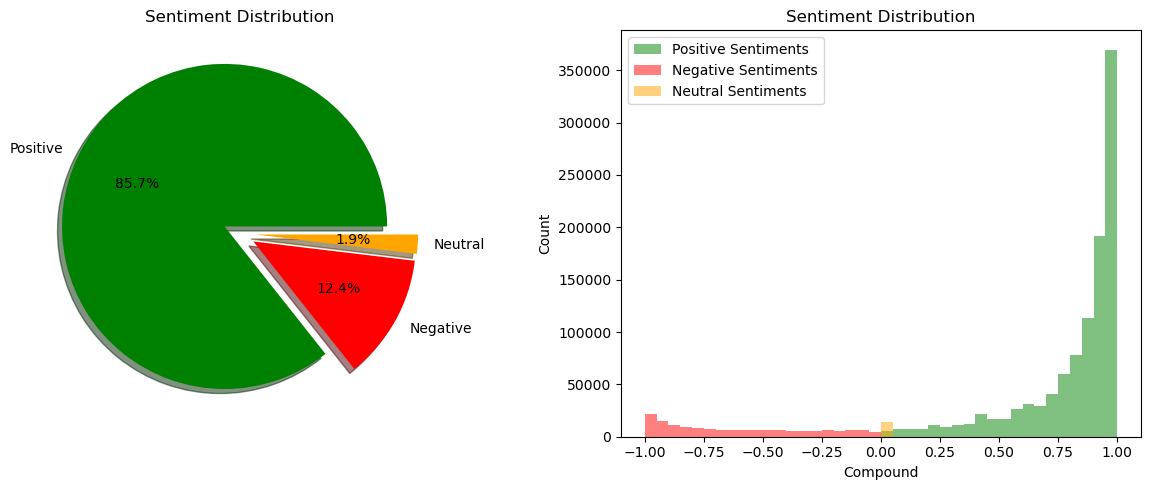

In [21]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = df['Sentiment'].value_counts()
colors = ['green', 'red', 'orange']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = df[df['compound'] > 0]['compound']
negative = df[df['compound'] < 0]['compound']
neutral = df[df['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

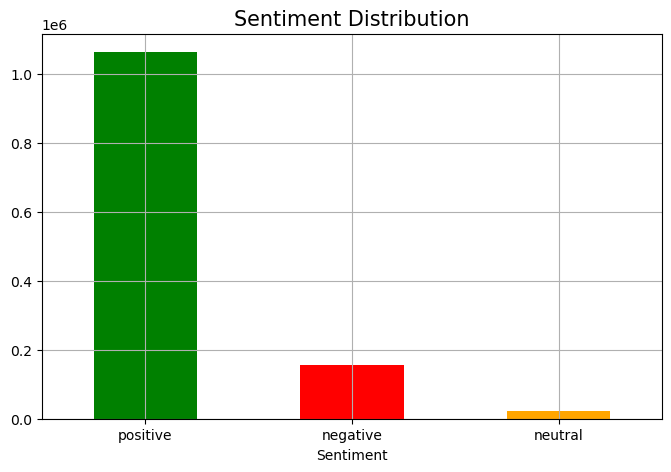

In [22]:
colors = ['green', 'red', 'orange']  # Defining colors 
df['Sentiment'].value_counts().plot(kind = 'bar', color=colors, figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

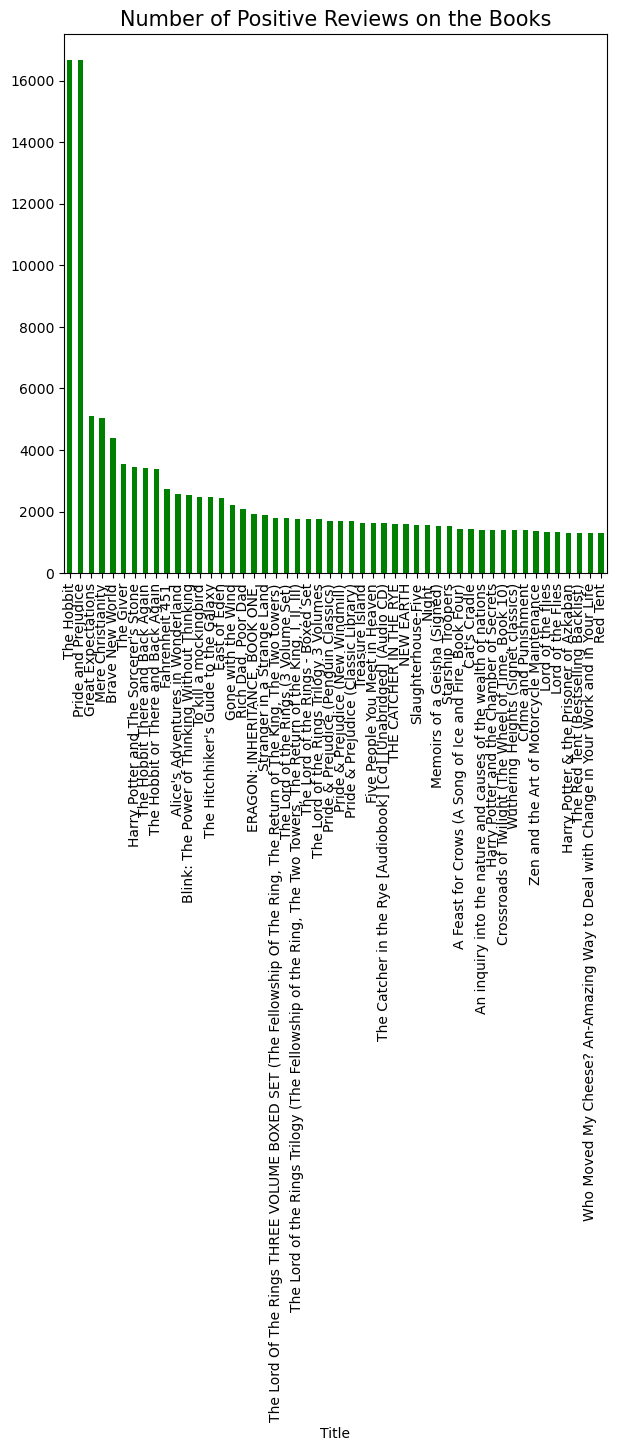

In [23]:
df[df['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar',color = 'green', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

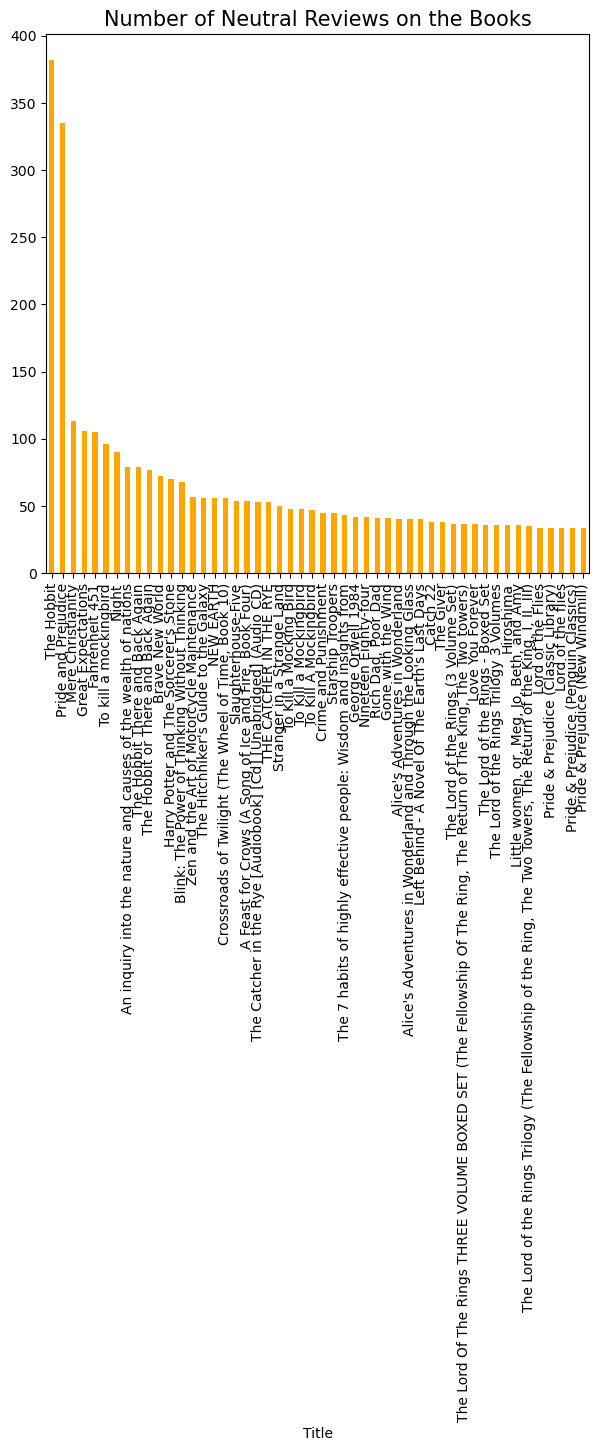

In [24]:
df[df['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar',color = 'orange', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

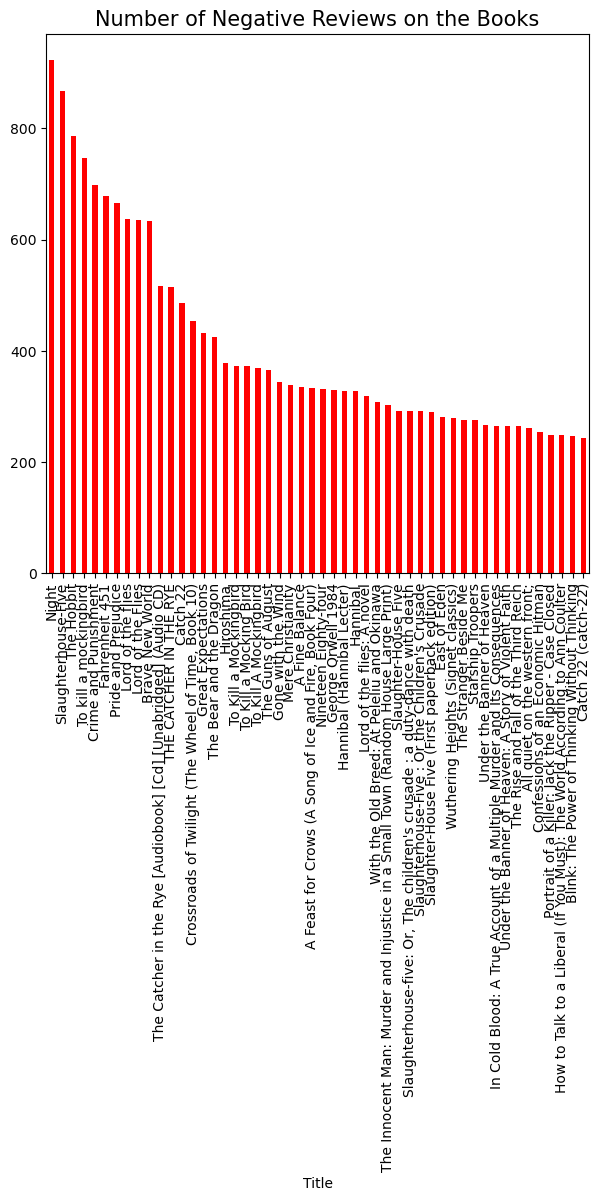

In [25]:
df[df['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar',color = 'red', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()